# Introduction to Exploritary Data Analysis
Analyzing a dataset typically involves several key steps :
- Step 0: Imports and Reading data
- Step 1: data Understanding
- Step 2: data Prep
- Step 3: Feature Understanding
- Step 4: Feature Relationships
- Step 5: Analyse Hypothese
- Step 6: data Cleaning
- Step 7: Model Building (If Applicable):
- Step 8: Model Evaluation:
- Step 9: Feature Engineering:
- Step 10: Feature Scalling:


# Step 0: Imports and Reading data

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as sc
import statistics as st
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
# plt.style.use('dark_background')
# plt.style.use('ggplot')

# df = pd.read_excel('C:/Users/ACTOAT/Desktop/p4/py/Physical_Test.xlsm',3)
data = pd.read_csv('D:\Paractical data scientist\Salary Prediction\Engineering_graduate_salary.csv')
df = data.copy()

## Step 1: data Understanding
- Analysis the shape : We'll just focus on the form of data : Ndr of rows & columns :

In [65]:
df.head(5)

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [66]:
df.shape  

(2998, 34)

In [67]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

- Elements of Structured data : 
    - % of each types of values data : 
    Unstructured data can be broken down into a couple of forms:
        - Continuous Numerical data that  can be infinitely divided (i.e. Weight)
        - Discrete Numerical data that cannot be divided (i.e. Year of birth)
        - Categorical Binary: data where there are only two options
        - Categorical Ordinal: data where the order of it matters

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

- Descriptive the data : (count rows, mean, std, min, mediane in 50% , max) of each column ,Percentile in 25% 50% 75% :standard deviation formula
- Descriptive the data variable : (min & max value is larger than zero or not)

In [69]:
df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,94.147098,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,177.784536,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


# [Step 2: data Preperation]()<a id="3"></a> <br>

- Dropping irrelevant columns and rows

In [70]:
df.drop(['ID', 'DOB', 'CollegeID', '12graduation' ,'10board', '12board' , 'CollegeState'
                                     ,'CollegeCityID', 'CollegeCityTier'
                                         ,'GraduationYear'], axis = 1, inplace = True)
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


- - Cleaning Column (not always use it)

In [71]:
df.drop_duplicates(inplace = True)
df.shape

(2998, 24)

<Axes: ylabel='proportion'>

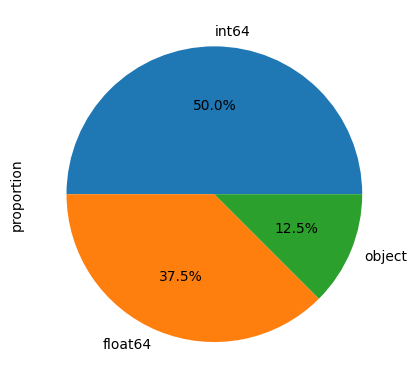

In [72]:
plt.figure()
df.dtypes.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

- - handle_rest_type

In [73]:
df['Specialization'].value_counts(ascending  = False)

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_21412\1449957877.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df['Specialization'],palette='deep')


<function matplotlib.pyplot.show(close=None, block=None)>

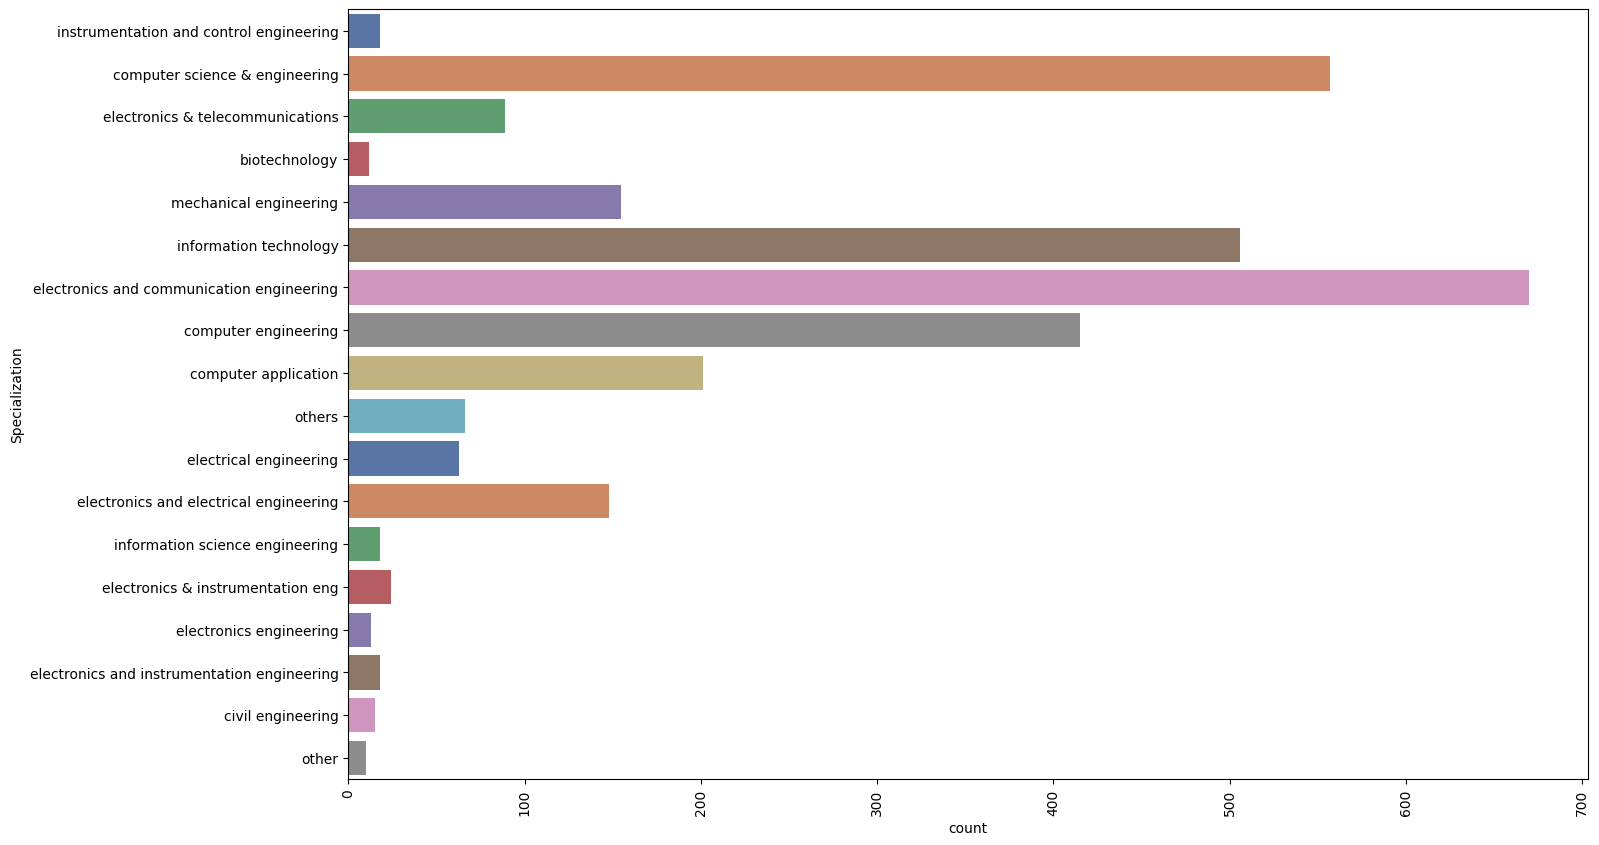

In [74]:
Specialization = df['Specialization'].value_counts(ascending  = False)
Specialization_lessthan1000 = Specialization[Specialization<10]
def handle_rest_type(value):
    if(value in Specialization_lessthan1000):
        return 'others'
    else:
        return value
df['Specialization'] = df['Specialization'].apply(handle_rest_type)
df['Specialization'].value_counts()
plt.figure(figsize = (16,10))
ax = sns.countplot(df['Specialization'],palette='deep')
plt.xticks(rotation=90)
plt.show

- - Check for data of duplcate rows

In [75]:
df.loc[df.duplicated(subset=['Specialization'])].head(5)

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
3,m,84.30,86.0,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.2727,0.4805,420000
5,f,83.16,77.0,1,M.Tech./M.E.,instrumentation and control engineering,99.93,535,595,620,0.376060,455,300,-1,-1,-1,313,-1,0.8463,-0.6201,-0.7585,-0.9950,-0.2859,440000
7,f,77.00,88.0,2,B.Tech/B.E.,computer science & engineering,71.00,370,470,280,0.704090,465,-1,-1,-1,-1,-1,-1,0.1282,0.5454,0.4711,0.9066,-0.2859,105000
9,f,57.00,73.0,2,B.Tech/B.E.,computer science & engineering,70.08,500,410,560,0.622643,385,-1,407,-1,-1,-1,-1,-0.7335,-0.4536,-0.2974,1.4136,0.6721,200000
10,m,77.00,75.0,2,B.Tech/B.E.,electronics & telecommunications,62.00,675,630,485,0.207392,405,260,-1,-1,-1,-1,-1,1.7081,0.5454,0.9322,-0.4879,0.8637,335000


In [76]:
dat = df.query('Specialization == "computer science & engineering"')

# [Step 3: Feature Understanding]()<a id="4"></a> <br>

- - Analyse target : (reg or classif) / (variables type:'numerical' or 'categorical') / (equilibre or not) classif non equilibre 10% of var1

In [77]:
df['Salary'].value_counts()

Salary
300000    207
180000    189
200000    154
325000    134
120000    121
         ... 
775000      1
705000      1
925000      1
585000      1
575000      1
Name: count, Length: 165, dtype: int64

Text(0.5, 0, 'Salary')

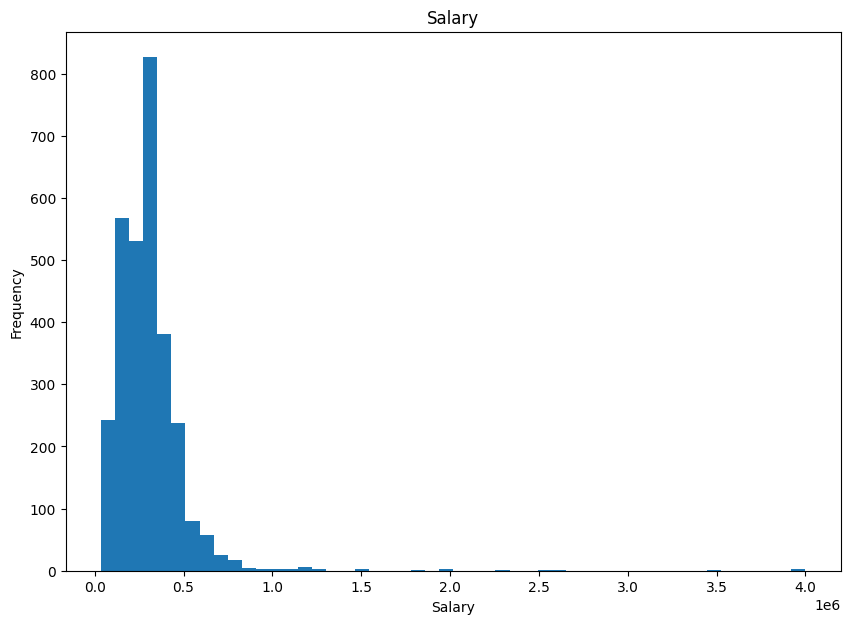

In [78]:
plt.figure(figsize=(10,7))
ax = df['Salary'].plot(kind='hist',bins=50,title='Salary')
ax.set_xlabel('Salary')

- - Histo des variables columns number : (distibution normale ou gausien symetrique or not) / uniforme / multi modale

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

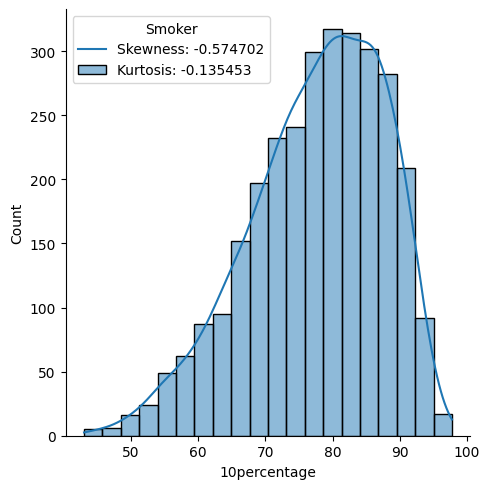

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

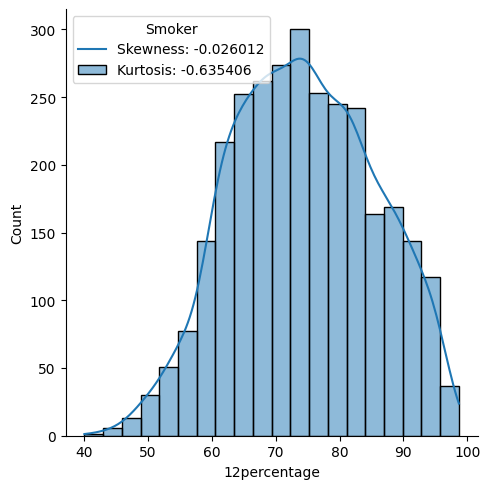

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

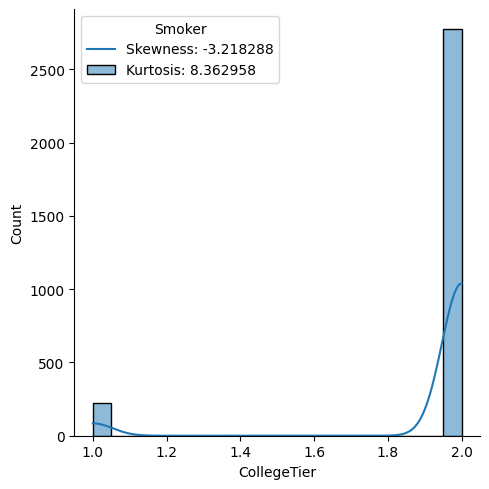

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

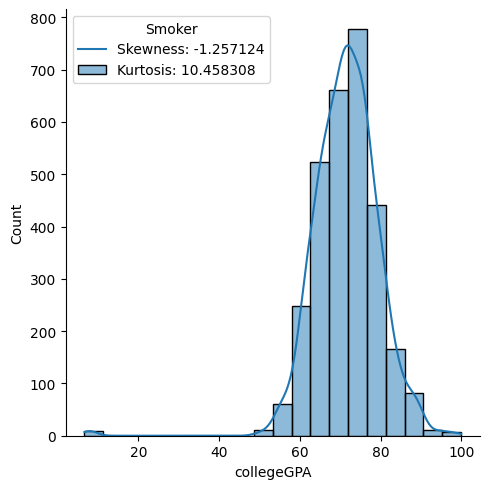

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

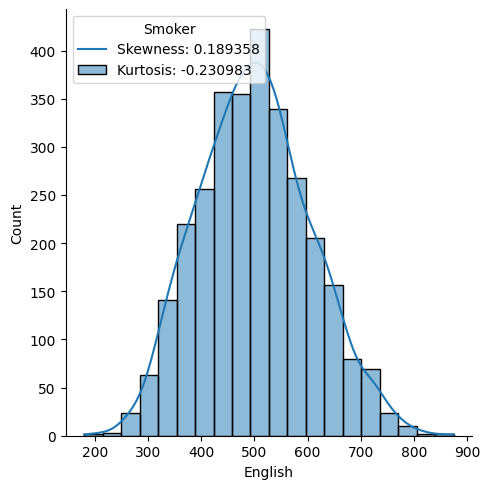

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

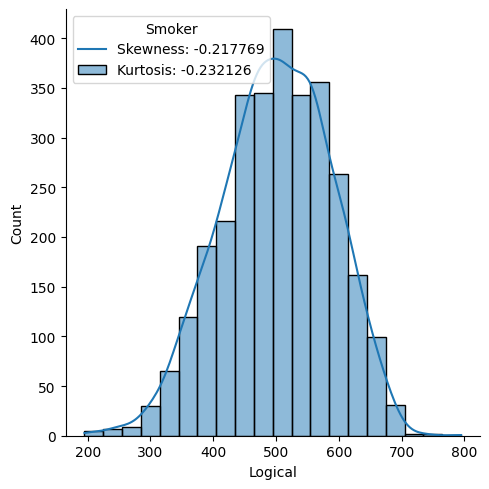

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

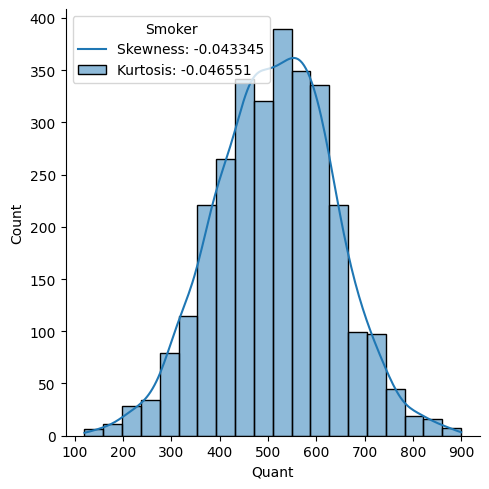

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

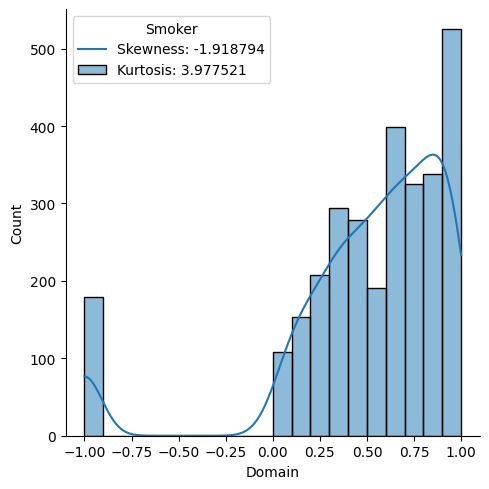

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

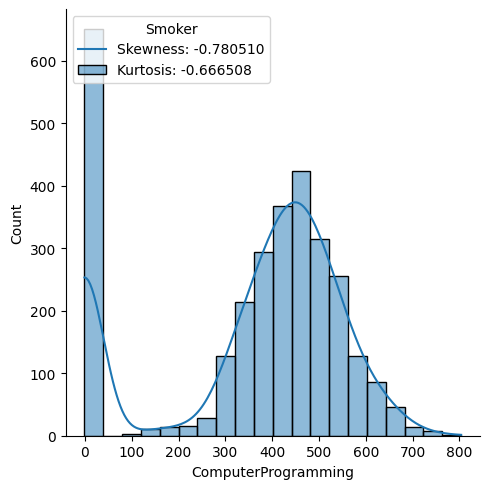

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

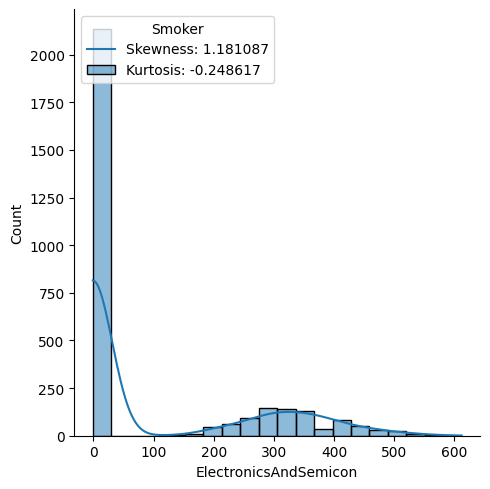

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

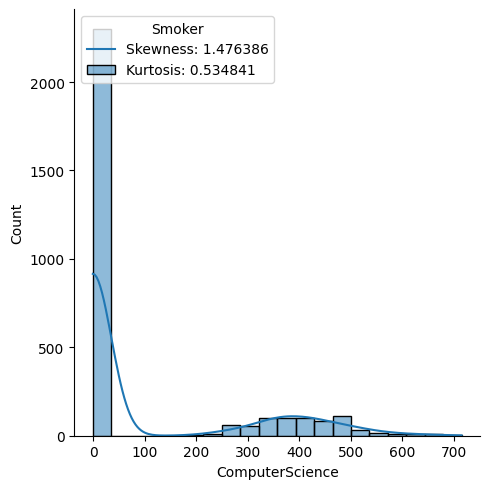

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

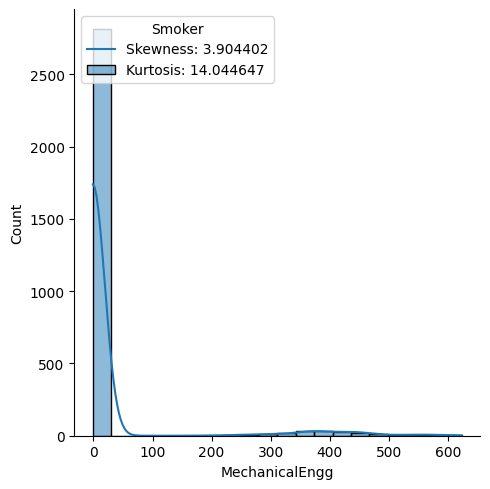

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

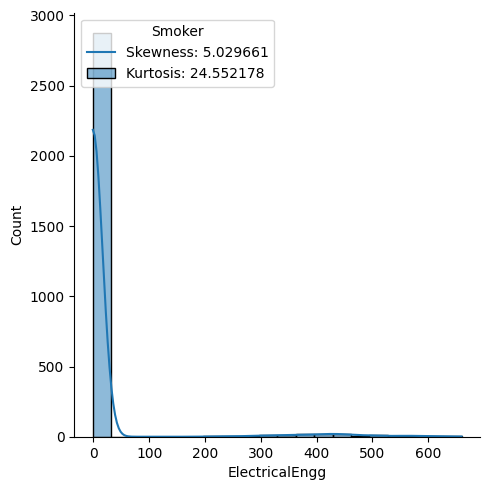

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

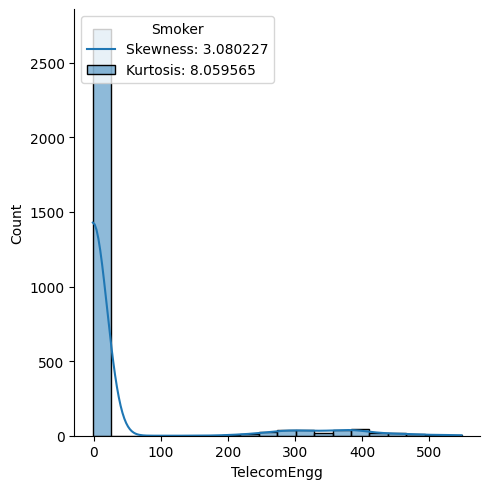

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

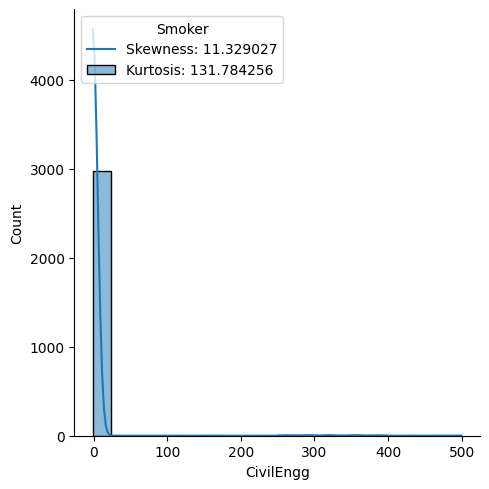

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

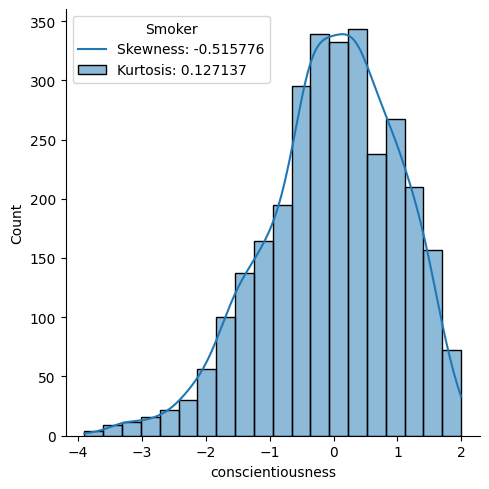

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

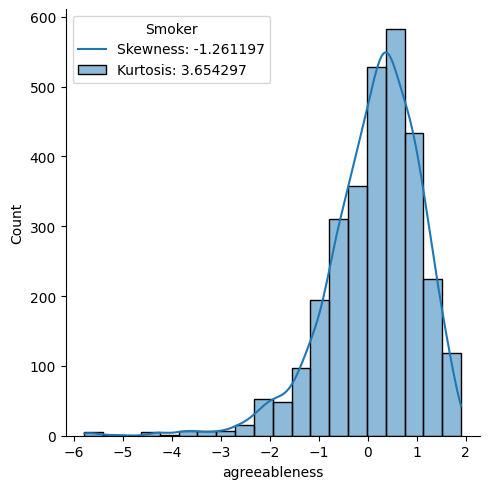

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

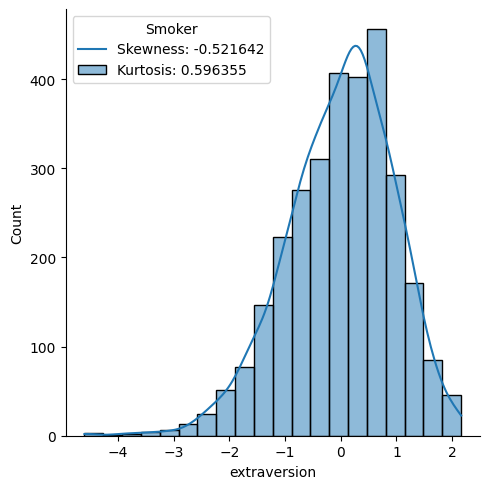

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

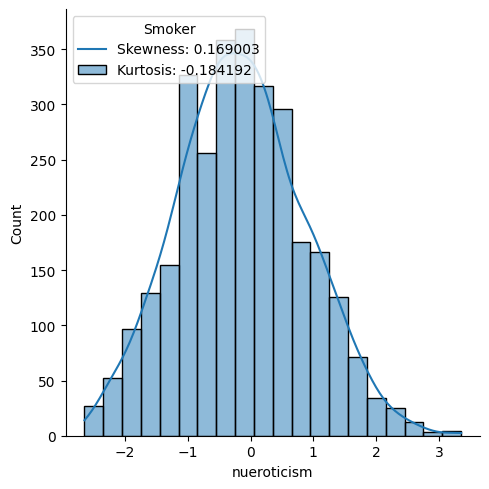

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

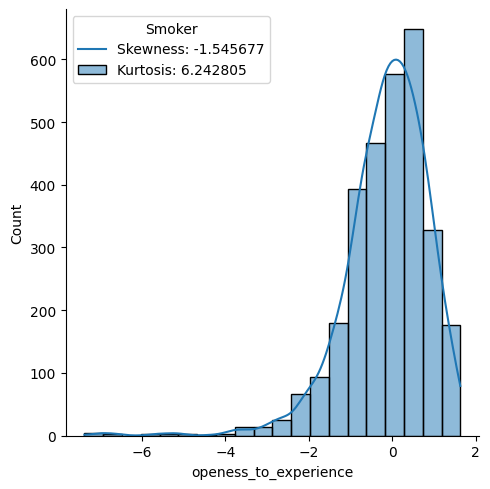

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x500 with 0 Axes>

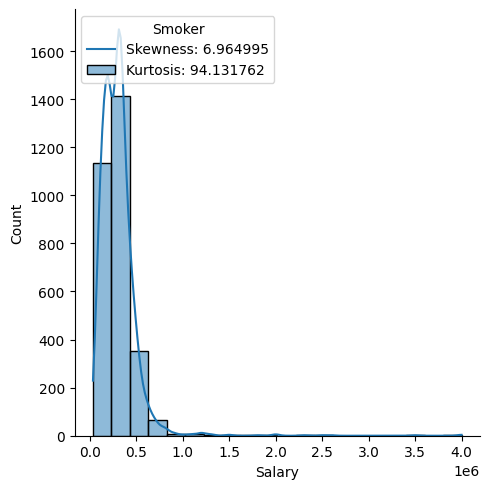

In [79]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = sns.displot(df, x=col,kde=True ,bins=20)
    plt.legend(title='Smoker', loc='upper left', labels=["Skewness: %f" % df[col].skew(),"Kurtosis: %f" % df[col].kurt()])
    plt.show(ax)

- - Histo des variables columns object : (binaire(0,1) or not) / (equilibre or not)

Gender-------------------------------------------- ['f' 'm']
Degree-------------------------------------------- ['B.Tech/B.E.' 'M.Tech./M.E.' 'MCA' 'M.Sc. (Tech.)']
Specialization------------------------------------ ['instrumentation and control engineering'
 'computer science & engineering' 'electronics & telecommunications'
 'biotechnology' 'mechanical engineering' 'information technology'
 'electronics and communication engineering' 'computer engineering'
 'computer application' 'others' 'electrical engineering'
 'electronics and electrical engineering'
 'information science engineering' 'electronics & instrumentation eng'
 'electronics engineering' 'electronics and instrumentation engineering'
 'civil engineering' 'other']


C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_21412\2398946446.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df['Degree'],palette='deep')
C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_21412\2398946446.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df['Specialization'],palette='deep')


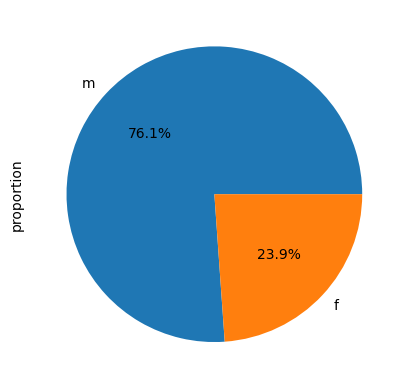

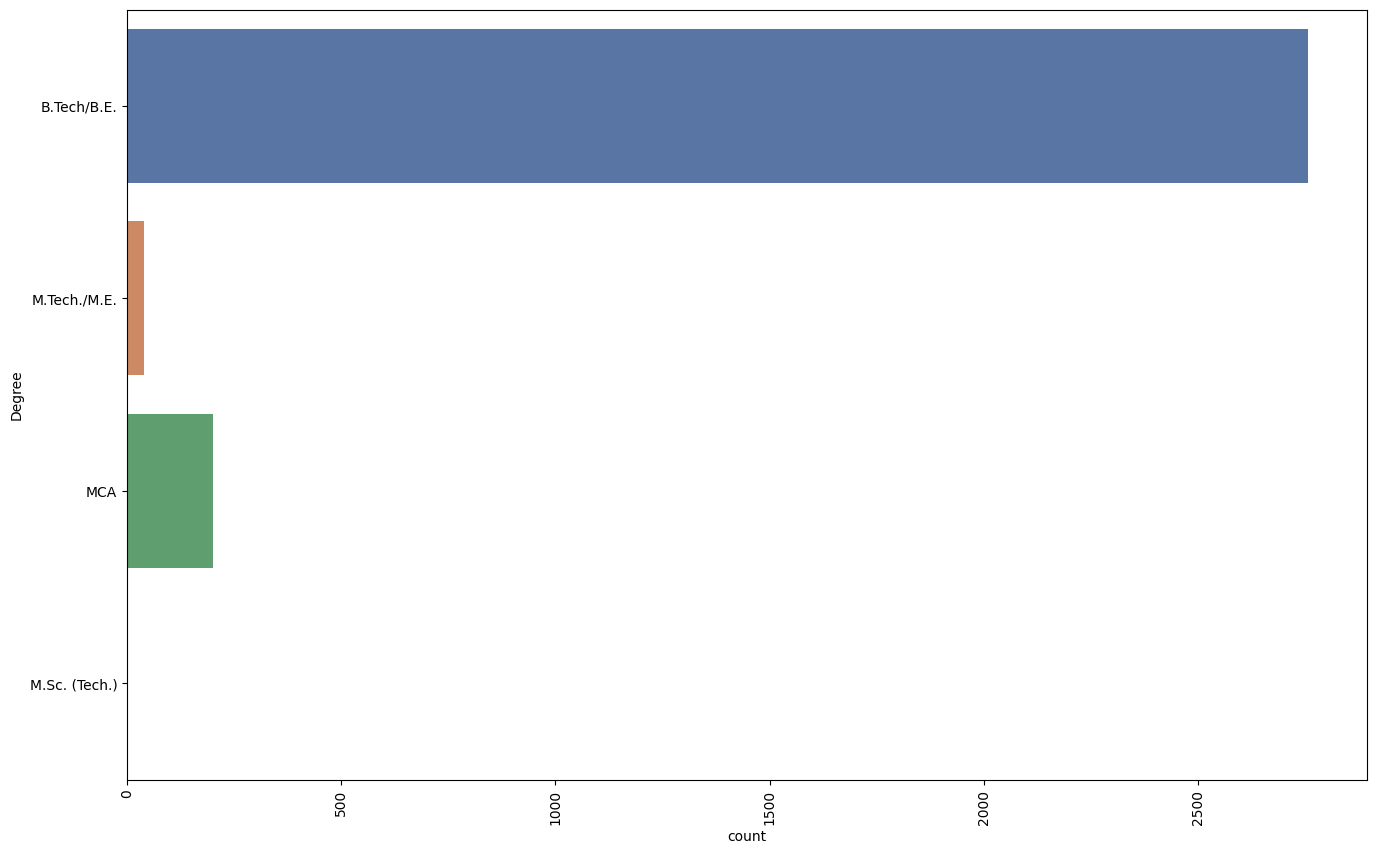

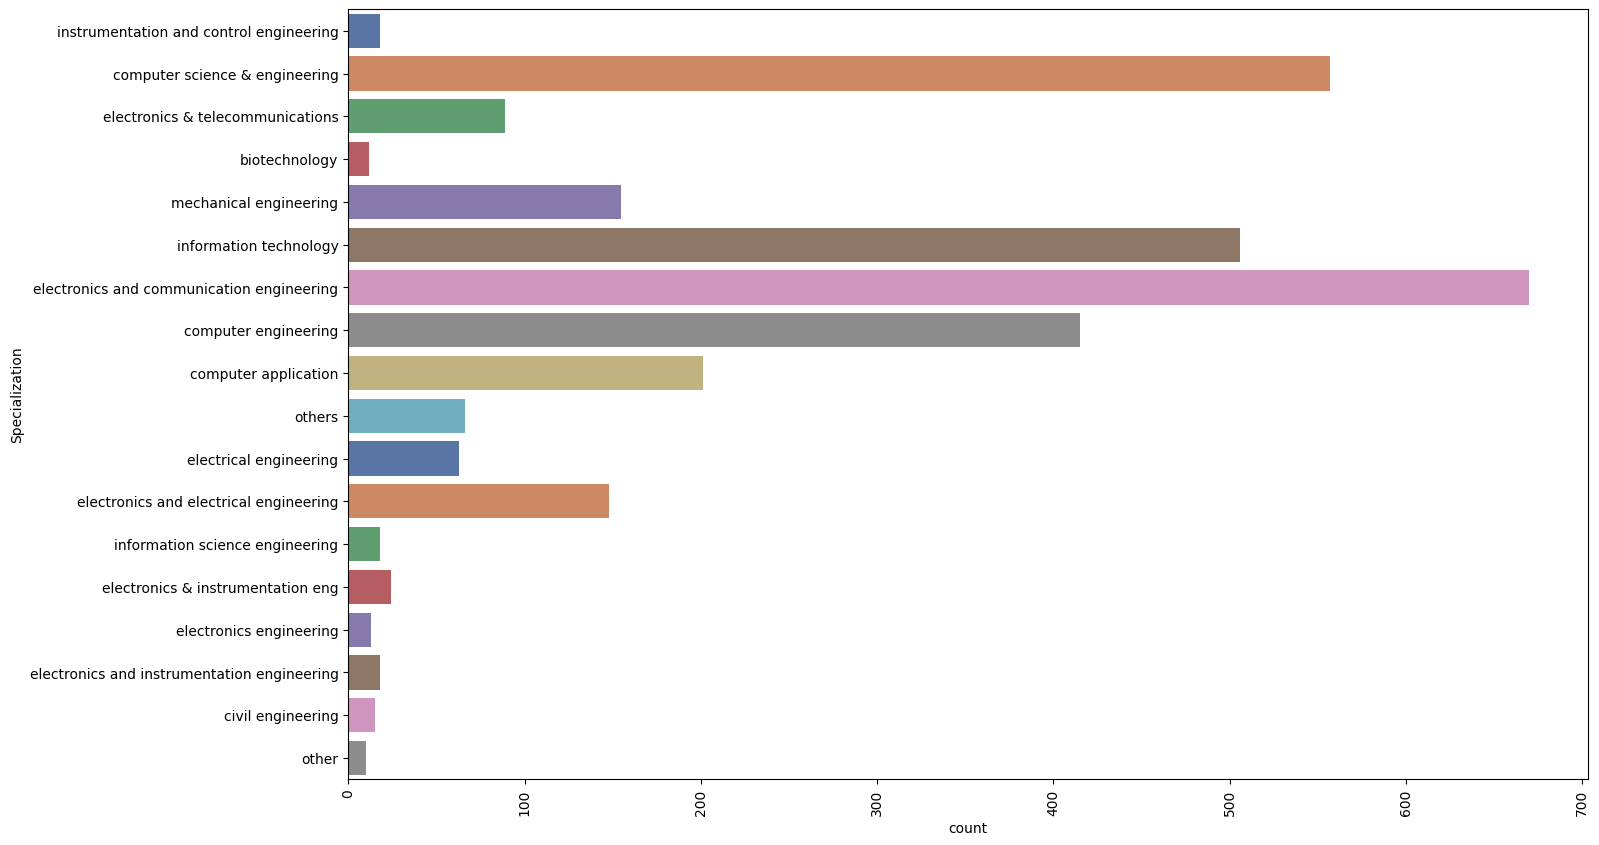

In [80]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')
    if col == "Specialization" :
        plt.figure(figsize = (16,10))
        ax = sns.countplot(df['Specialization'],palette='deep')
        plt.xticks(rotation=90)
        plt.show
    elif col == "Degree" :
        plt.figure(figsize = (16,10))
        ax = sns.countplot(df['Degree'],palette='deep')
        plt.xticks(rotation=90)
        plt.show
    else:
        plt.figure()
        df[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

- - Verifie outliers

<Axes: xlabel='Salary'>

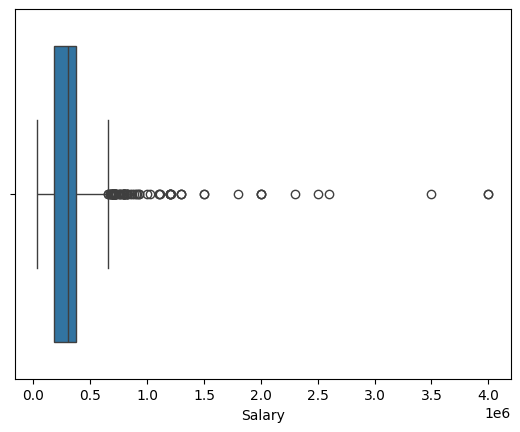

In [81]:
sns.boxplot(x=df['Salary'])    

<Axes: ylabel='Salary'>

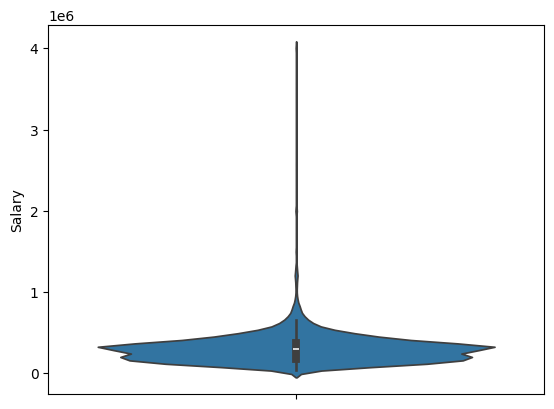

In [82]:
sns.violinplot(df['Salary'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


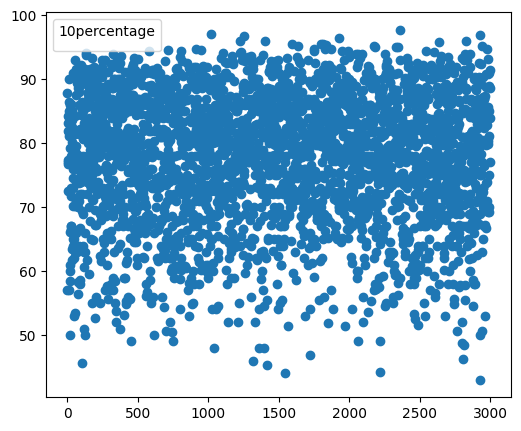

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


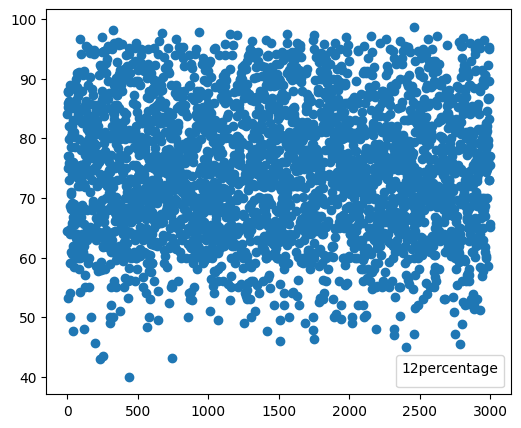

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


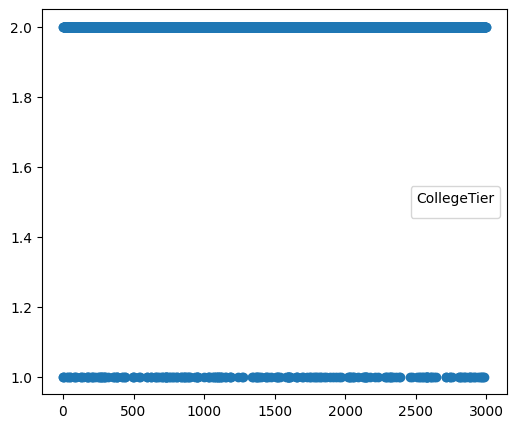

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


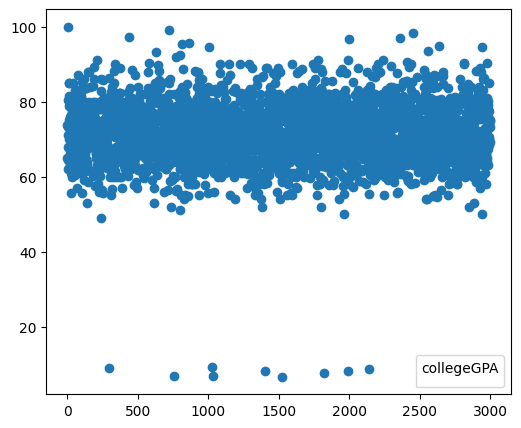

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


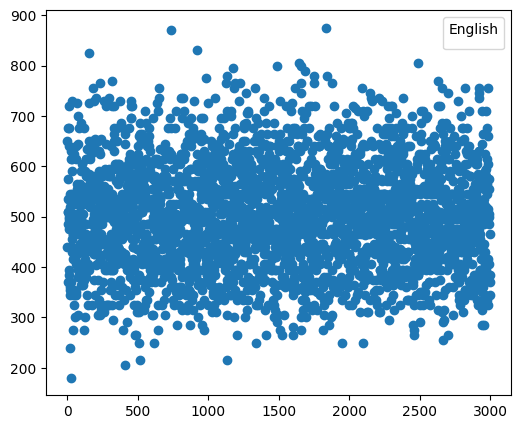

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


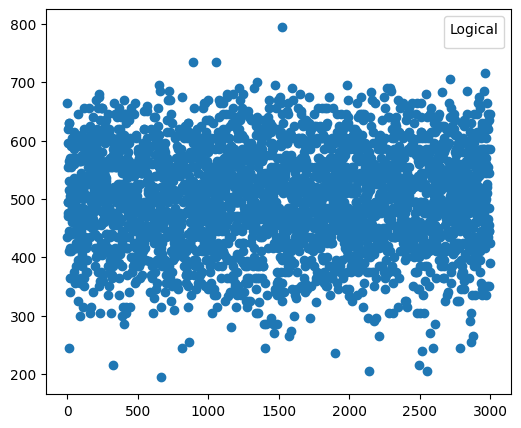

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


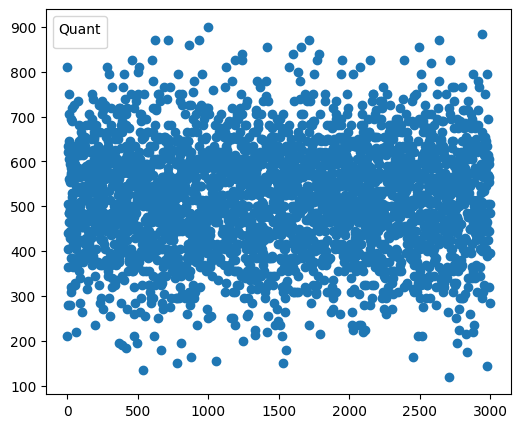

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


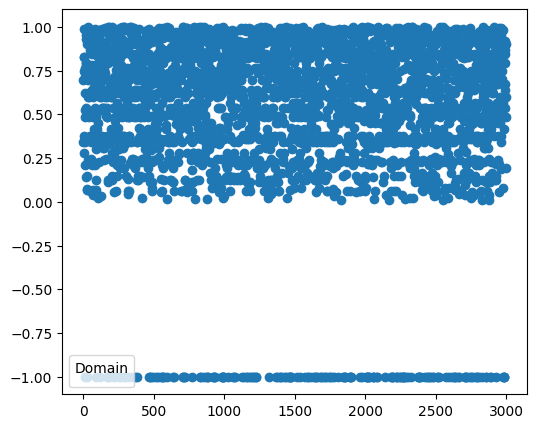

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


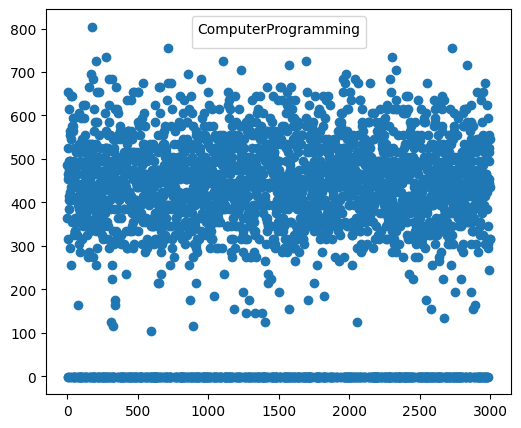

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


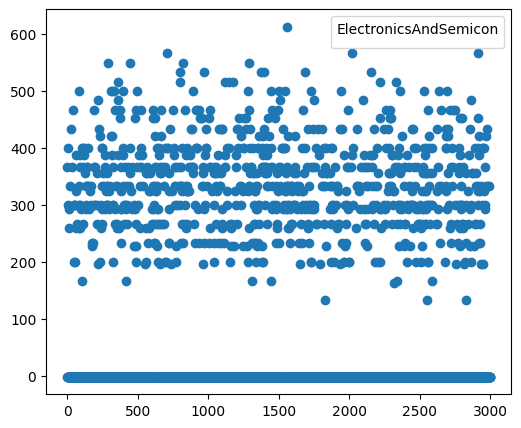

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


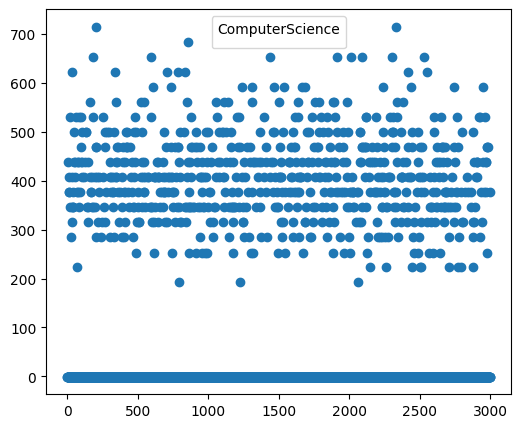

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


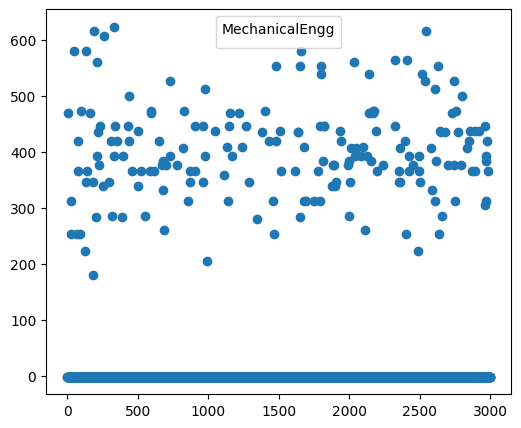

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


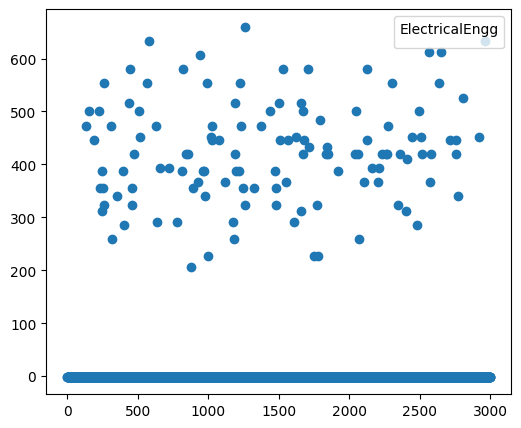

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


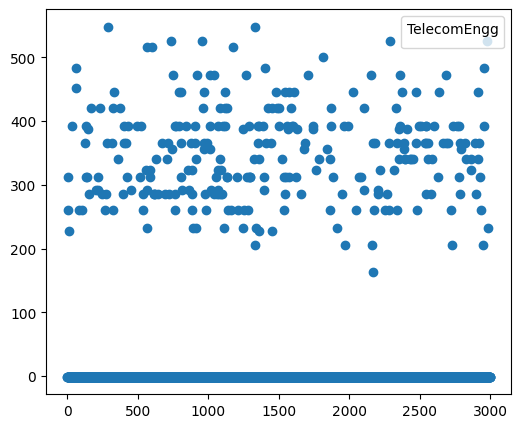

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


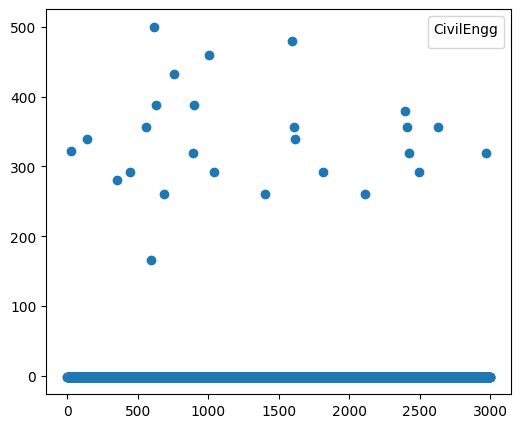

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


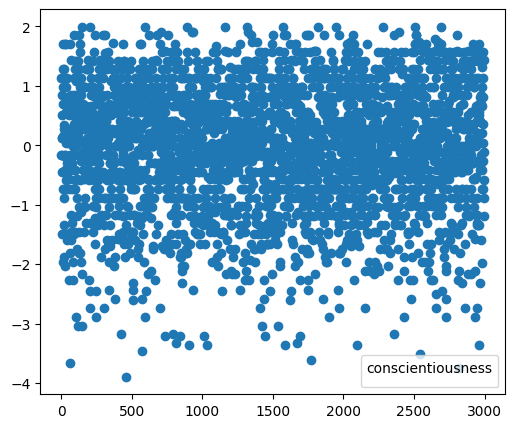

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


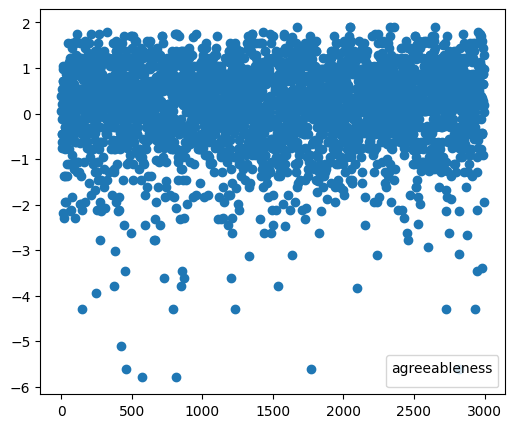

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


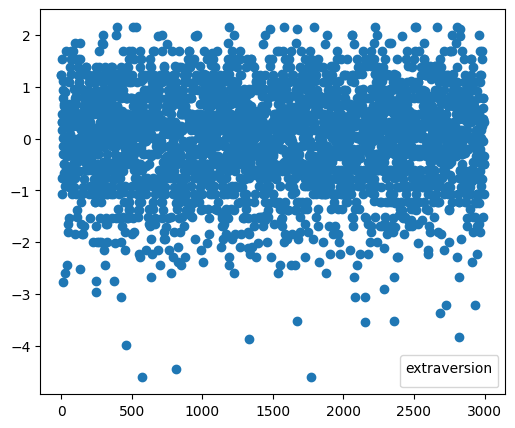

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


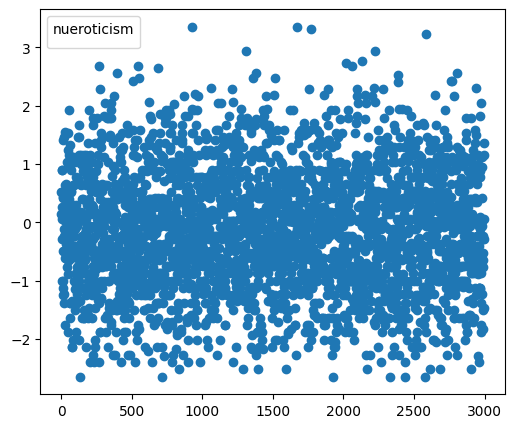

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


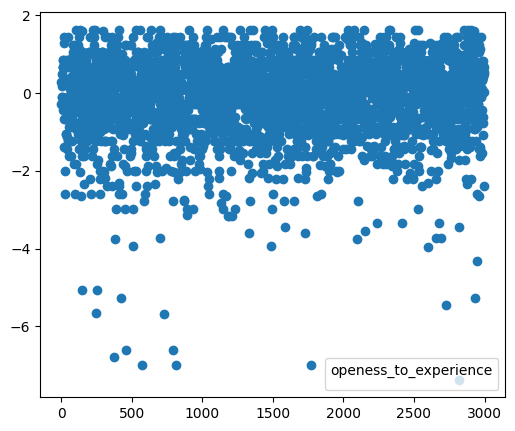

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


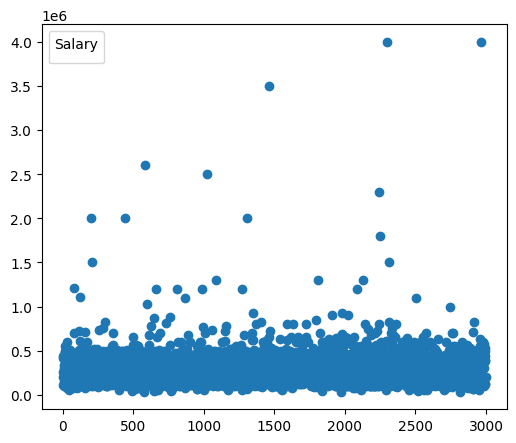

In [83]:
for col in df.select_dtypes(include=['int','float']):
    plt.figure(figsize=(6,5))
    ax = plt.scatter(df.index, df[col])
    plt.legend(title=col)
    plt.show(ax)

# [Step 4: Feature Relationships]()<a id="5"></a> <br>

- - Relation variables/variables : (Taux de corre variables/variables>0.9)

<Axes: >

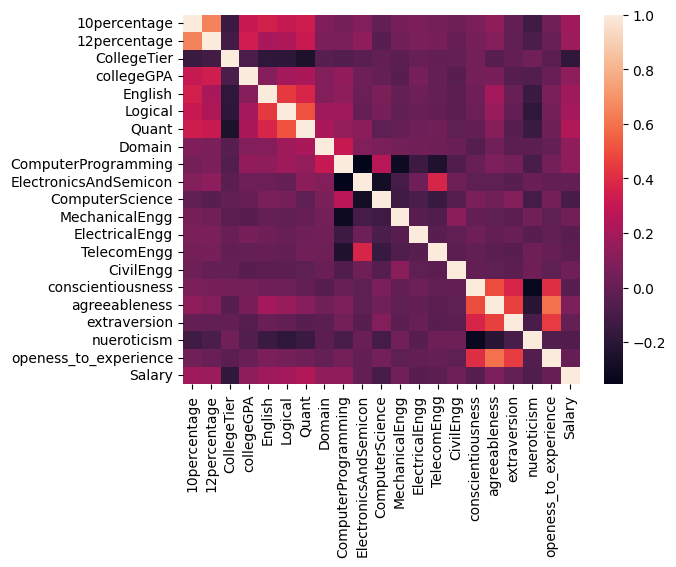

In [84]:
numeric_cols = df.select_dtypes(exclude='object').columns
df_corr = df[numeric_cols].dropna().corr()
sns.heatmap(df_corr, annot=False)

In [85]:
sns.pairplot(df)
plt.show()

c:\Users\Farouq MOUSMI\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


- - Relation Target/Variables : (Taux variables/target >0.9) We ll try to understand how the target and other types variables relate.. 

C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_21412\2160967154.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']==cat][col],kde=True,label=cat)
C:\Users\Farouq MOUSMI\AppData\Local\Temp\ipykernel_21412\2160967154.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['

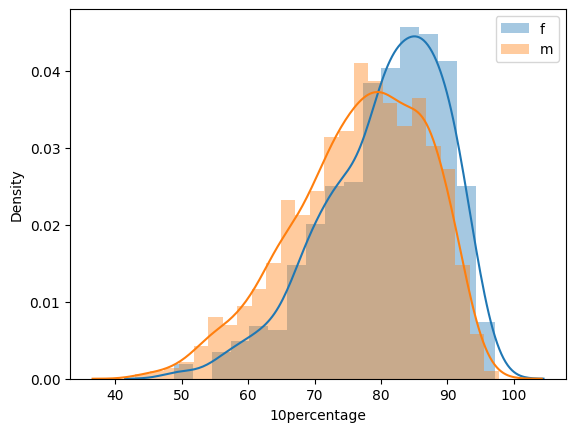

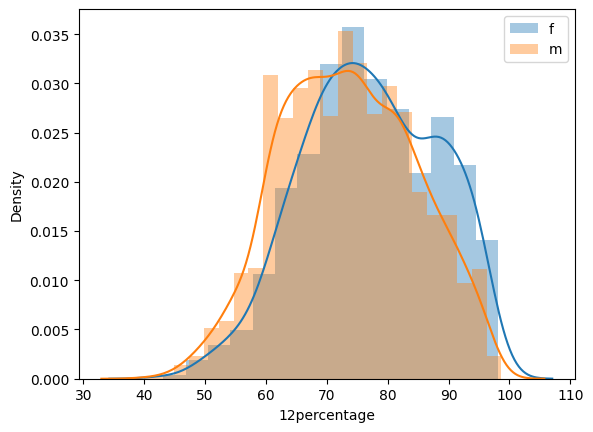

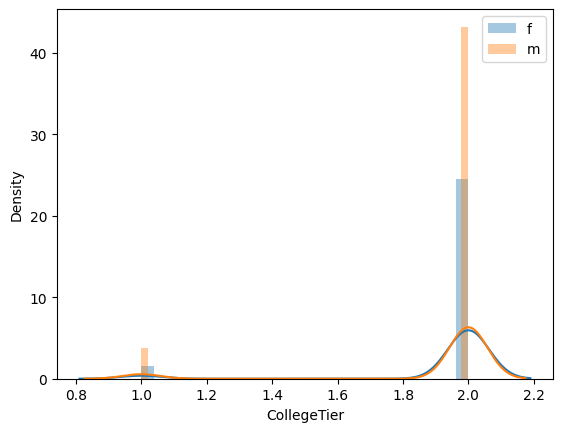

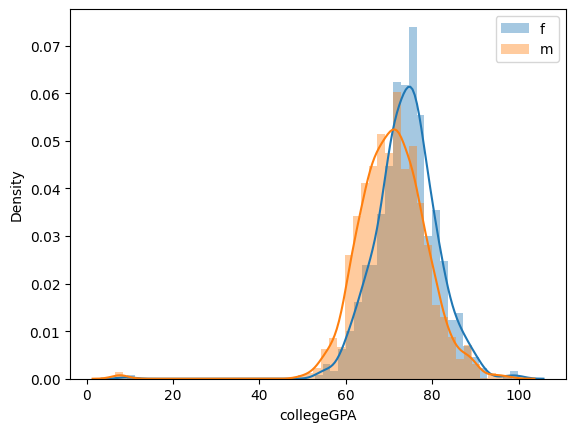

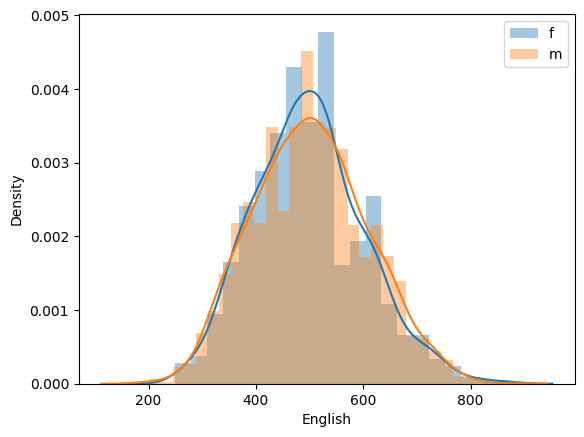

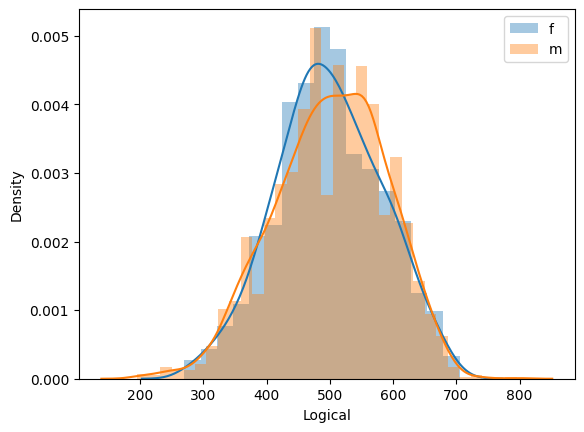

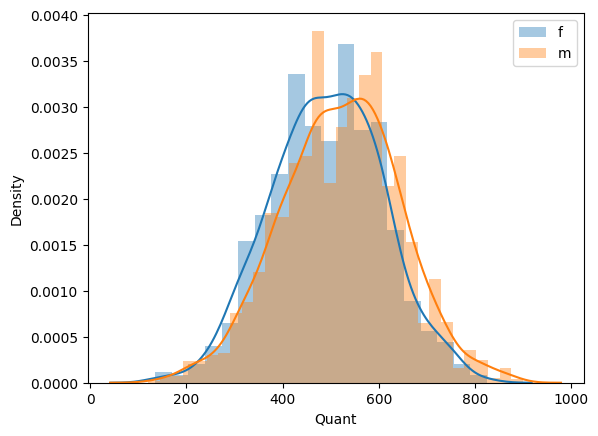

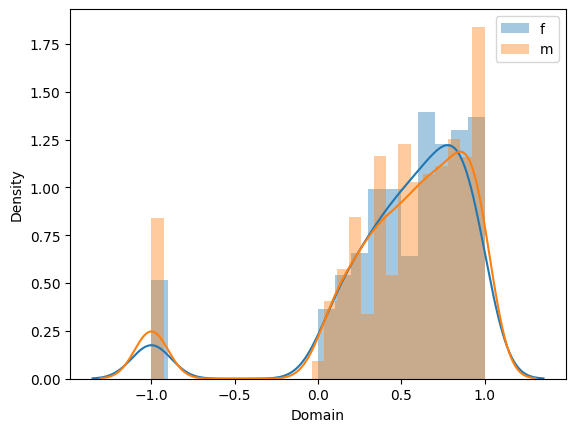

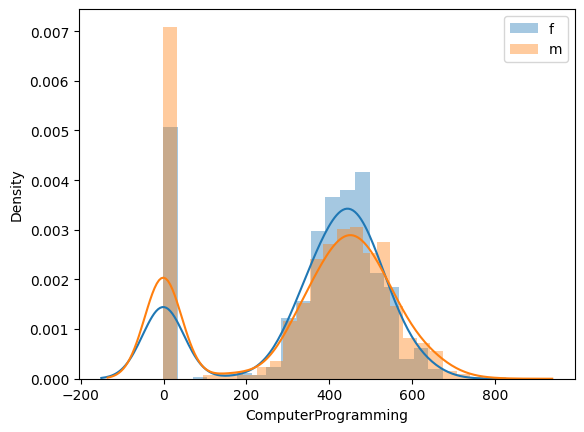

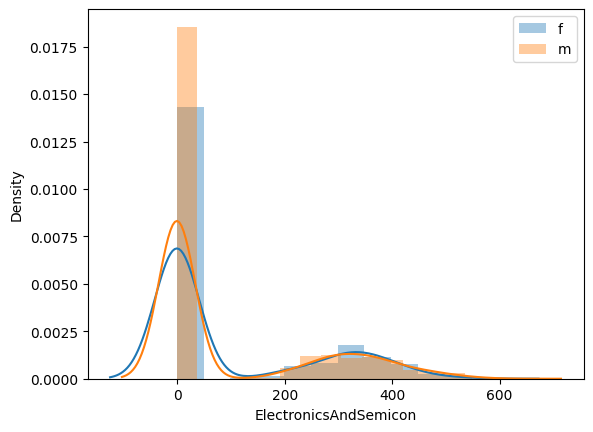

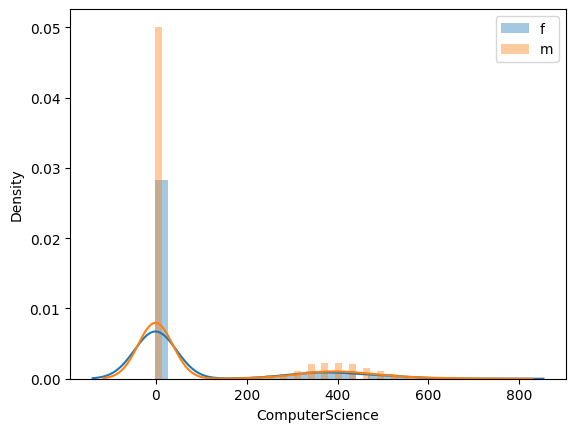

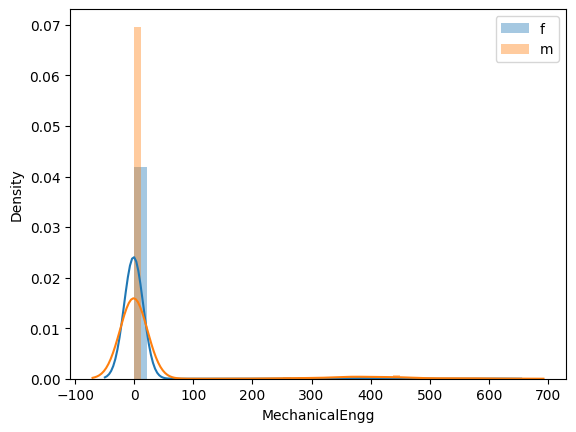

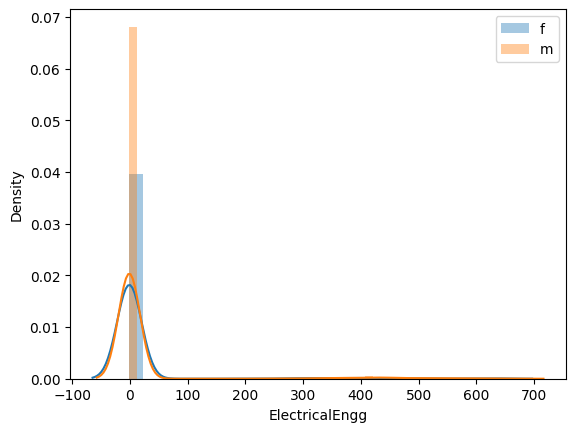

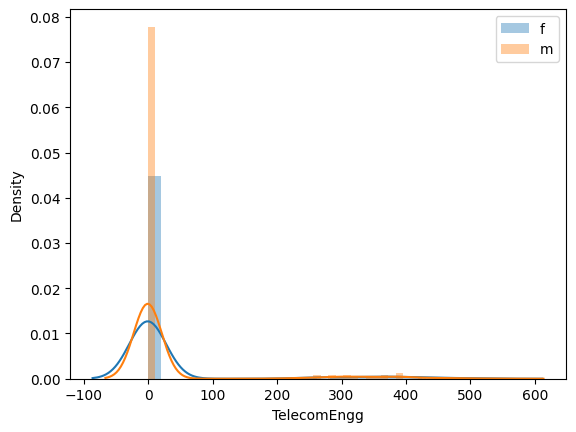

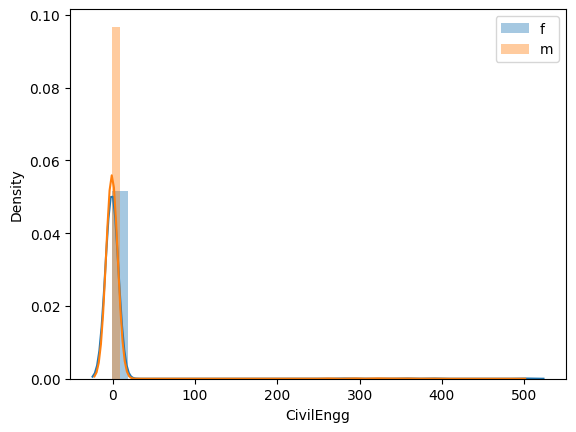

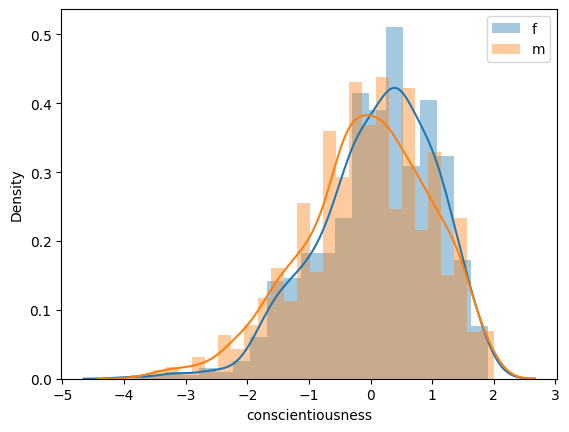

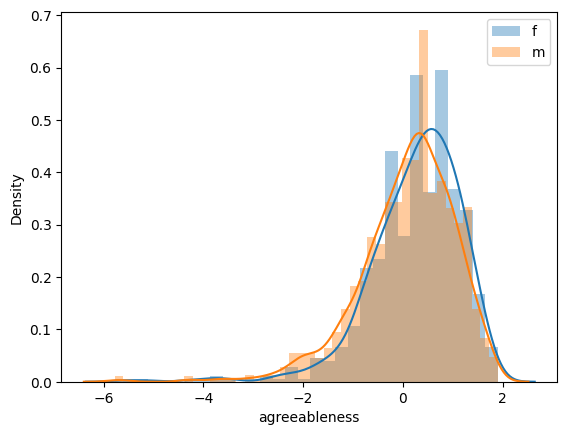

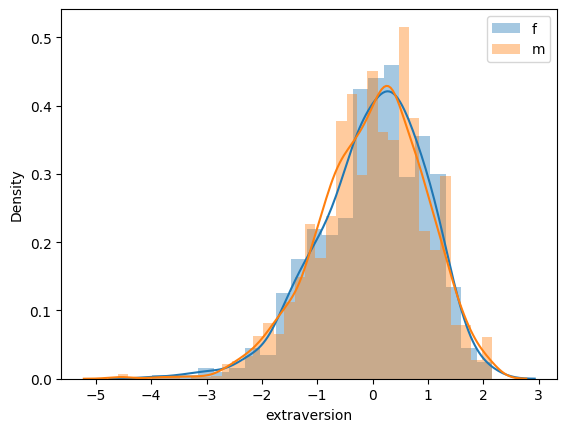

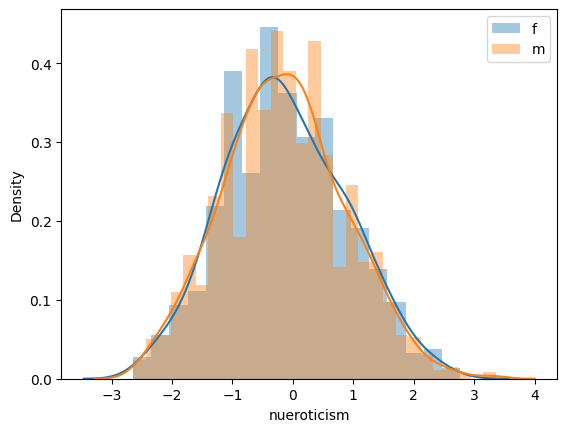

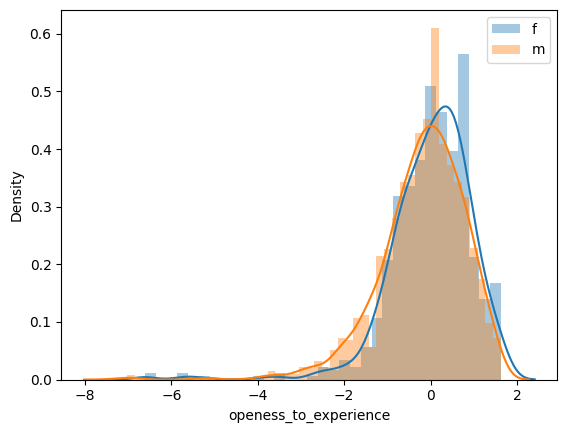

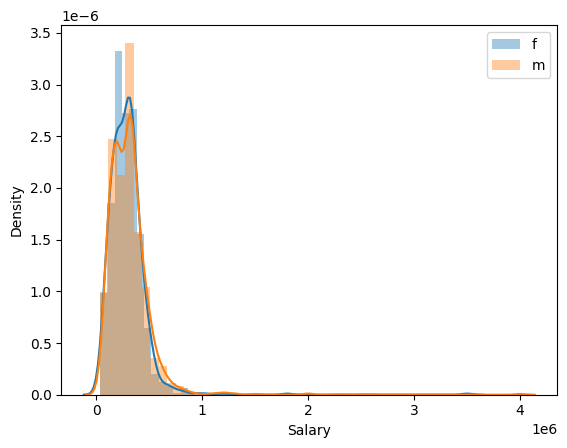

In [ ]:
for col in df.select_dtypes(include=['float','int']):
    plt.figure()     
    for cat in df['Gender'].unique():
        sns.distplot(df[df['Gender']==cat][col],kde=True,label=cat)
    plt.legend()

## **Data Preprocessing**

In [ ]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)

df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,84.00,1,0,14,73.82,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,0,4,65.00,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,0,7,61.94,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,0,4,80.40,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,75.00,2,0,0,64.30,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


## **Model Building (If Applicable)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

x = df.drop('Salary', axis=1)
y = df['Salary']

sc = StandardScaler()
x = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)


## **Predicting X_test Data**

In [ ]:
predictions = xgb.predict(X_test)
diff = y_test - predictions

## **Visualizing Difference**

In [ ]:
plt.figure(figsize = (12,6))
sns.distplot(diff)